In [ ]:
!pip install kaggle

In [ ]:
#congigure the path file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#dataset api from kaggle
!kaggle competitions download -c cifar-10

 98% 704M/715M [00:06<00:00, 133MB/s]
100% 715M/715M [00:08<00:00, 91.8MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile
dataset="/content/cifar-10.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('dataset is extracted successfuly')

dataset is extracted successfuly


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 32.4 MB/s eta 0:00:00


In [ ]:
#extracting train file
import py7zr

archive=py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames=os.listdir('/content/train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5]) #print the first 5 elements in the list
print(filenames[-5:]) #print the last 5 elements in the list

['18435.png', '15543.png', '24474.png', '7159.png', '20866.png']
['28476.png', '45243.png', '33523.png', '11655.png', '2537.png']


Label Processing

In [ ]:
labels=pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels.shape

(50000, 2)

In [ ]:
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels[labels['id']==22302]

,id,label
22301,22302,dog


In [ ]:
labels['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_encoded={'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

In [ ]:
labels_search=[labels_encoded[i] for i in labels['label']]

In [ ]:
print(labels_search[0:5])
print(labels_search[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


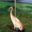

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/31998.png')
cv2_imshow(img)

In [ ]:
labels[labels['id']==31998]

,id,label
31997,31998,bird


In [ ]:
id_list=list(labels['id'])

In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [ ]:
#convert images to numpy array

train_data_folder='/content/train'
train_data=[]
for img in id_list:
  image=Image.open(train_data_folder+'/'+str(img)+'.png')
  image=np.array(image)
  train_data.append(image)

In [ ]:
type(train_data)

list

In [ ]:
len(train_data)

50000

In [ ]:
type(train_data[0])

numpy.ndarray

In [ ]:
train_data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
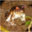

In [ ]:
train_data[0]

In [ ]:
x=np.array(train_data)
y=np.array(labels_search)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000,)
(10000,)


In [ ]:
#Scaling
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

The Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [ ]:
num_classes=10

#setting up the neural layers
model=keras.Sequential([
     keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_classes,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compile the neural
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#training the neural network
model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2293 - loss: 2.1112 - val_accuracy: 0.3285 - val_loss: 1.8422
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3228 - loss: 1.8639 - val_accuracy: 0.3252 - val_loss: 1.8439
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3402 - loss: 1.8356 - val_accuracy: 0.2945 - val_loss: 1.9145
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3405 - loss: 1.8264 - val_accuracy: 0.3230 - val_loss: 1.8717
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3446 - loss: 1.8169 - val_accuracy: 0.3385 - val_loss: 1.8284
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3472 - loss: 1.8046 - val_accuracy: 0.3548 - val_loss: 1.8067
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3528 - loss: 1.8027 - val_accuracy: 0.3440 - val_loss: 1.8237
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3561 - loss: 1.7840 - 

ResNet50

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras import optimizers

In [ ]:
conv_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))
conv_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_classes,activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 449s 350ms/step - accuracy: 0.3867 - loss: 1.8560 - val_accuracy: 0.7770 - val_loss: 0.7755
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 411s 352ms/step - accuracy: 0.7529 - loss: 0.8536 - val_accuracy: 0.9047 - val_loss: 0.3600
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 352ms/step - accuracy: 0.8648 - loss: 0.5598 - val_accuracy: 0.9237 - val_loss: 0.2942
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 387s 344ms/step - accuracy: 0.9160 - loss: 0.4054 - val_accuracy: 0.9290 - val_loss: 0.2475
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 386s 343ms/step - accuracy: 0.9450 - loss: 0.3057 - val_accuracy: 0.9335 - val_loss: 0.2378
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 451s 352ms/step - accuracy: 0.9650 - loss: 0.2293 - val_accuracy: 0.9283 - val_loss: 0.2406
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 343ms/step - accuracy: 0.9757 - loss: 0.1806 - val_accuracy: 0.9362 - val_loss: 0.2261
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 343ms/step - ac

In [ ]:
# Evaluate Model
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.9365 - loss: 0.2352
Test Loss: 0.22993484139442444
Test Accuracy: 0.9380000233650208


313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 112ms/step


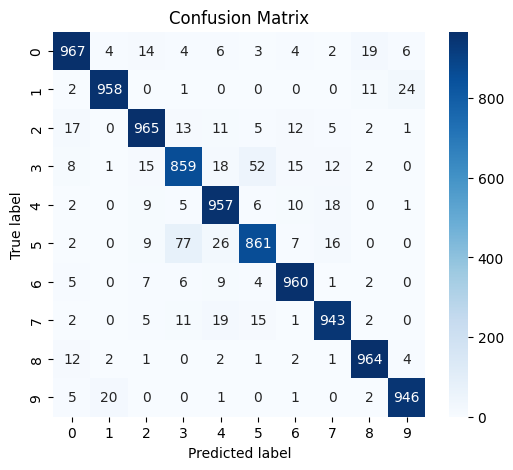

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict the values from the test dataset
Y_pred = model.predict(x_test_scaled)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)

# Convert test observations to one hot vectors
# The line below was causing the error.
# Instead of using np.argmax, we should directly use y_test
# which contains the true labels for each sample.
Y_true = y_test
# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plotting confusion matrix for 10 classes (0-9)
plot_confusion_matrix(confusion_mtx, classes=range(10))

In [ ]:
# Classificatio report

from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(Y_true, Y_pred_classes, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.9462    0.9397    0.9430      1029
           1     0.9726    0.9618    0.9672       996
           2     0.9415    0.9360    0.9387      1031
           3     0.8801    0.8747    0.8774       982
           4     0.9123    0.9494    0.9305      1008
           5     0.9092    0.8627    0.8853       998
           6     0.9486    0.9658    0.9571       994
           7     0.9449    0.9449    0.9449       998
           8     0.9602    0.9747    0.9674       989
           9     0.9633    0.9703    0.9668       975

    accuracy                         0.9380     10000
   macro avg     0.9379    0.9380    0.9378     10000
weighted avg     0.9379    0.9380    0.9378     10000

